# CS224n: NLP with Deep Learning

# Lecture 8: Machine Translation

---

## Statistical Machine Translation

Idea:  
Learn a probabilistic model, using our data

Using Bayes Rule, it can be decomposed into:
* Translation Model:  
Know about translation of local chunks of phrases

* Language Model:  
Writing good English (target language)

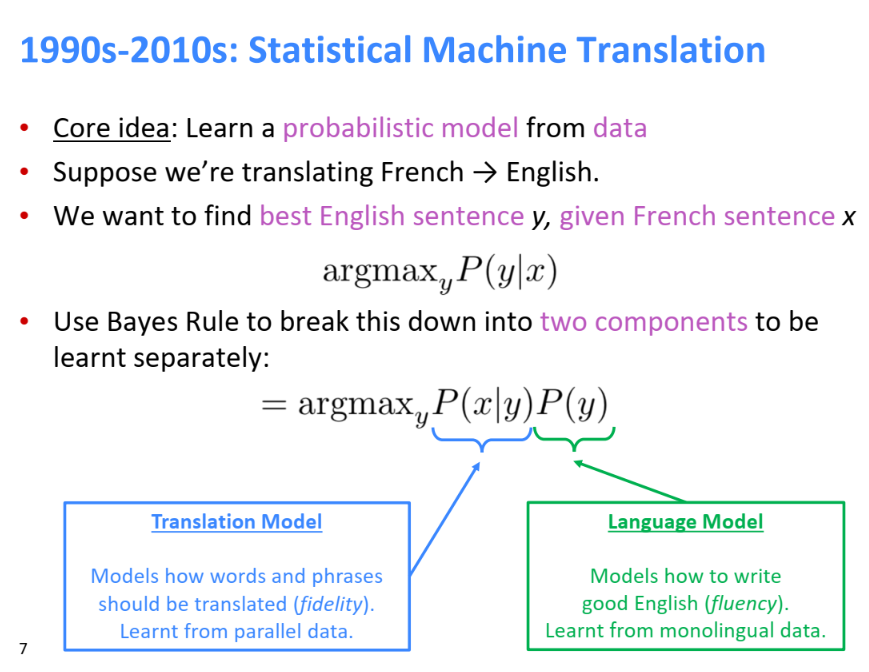

---

## Alignment

Alignment = correspondence between particular words

* Not necessarily bijective:  
Can be:
    * Many-to-one
    * One-to-many: the **one** word is called a *fertile* word
    * Many-to-many

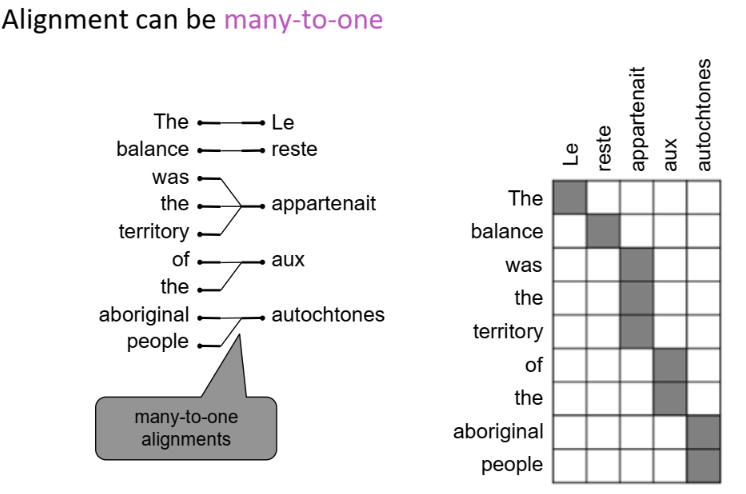

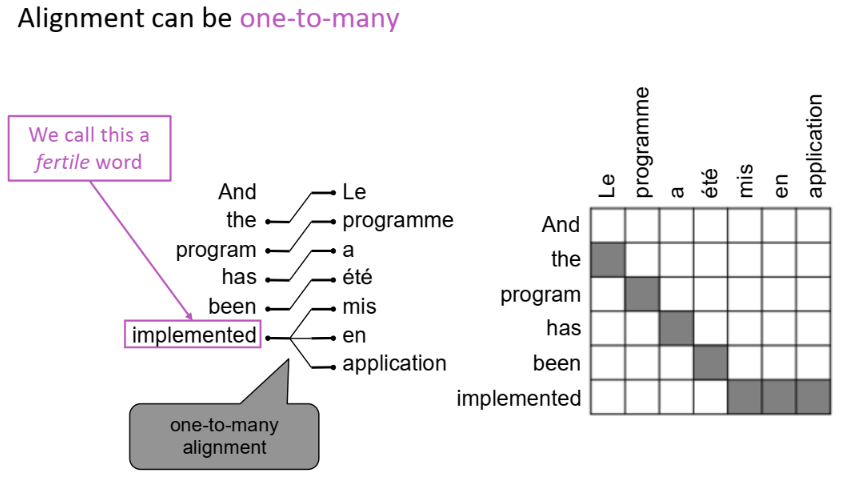

## Back to SMT

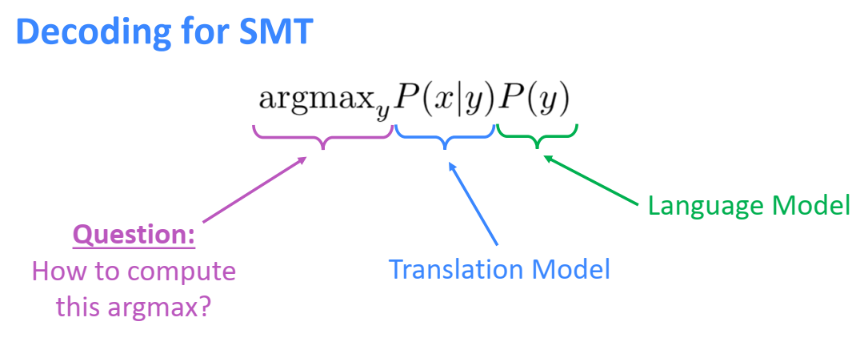

* We can't enumerate every $y$ to calculate this probability

* We explore the different possibilities, and discard the low-probability ones as we go  
 → Beam Search

---

## Neural Machine Translation

* Neural Machine Translation is called **sequence-to-sequence** (seq2seq)
* Involves 2 RNN

### Other usages of Seq2seq

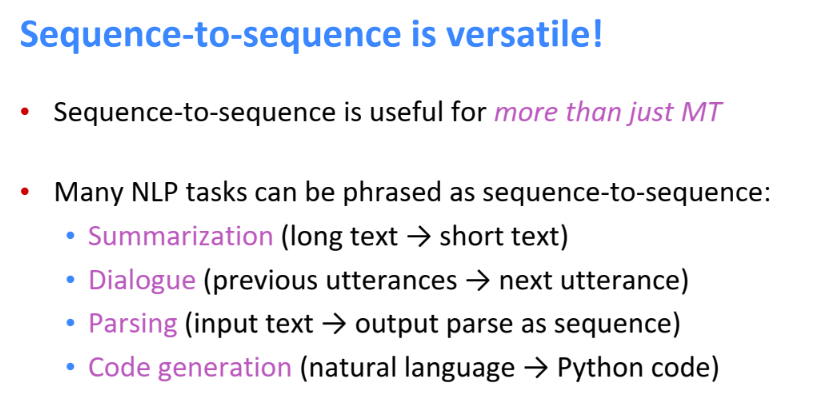

### Encoding / Decoding

* Encoding of the source sentence = last hidden state of the Decoder RNN

* Decoder RNN is a **conditional** Language Model, as it is conditioned on this encoding

### At Test time

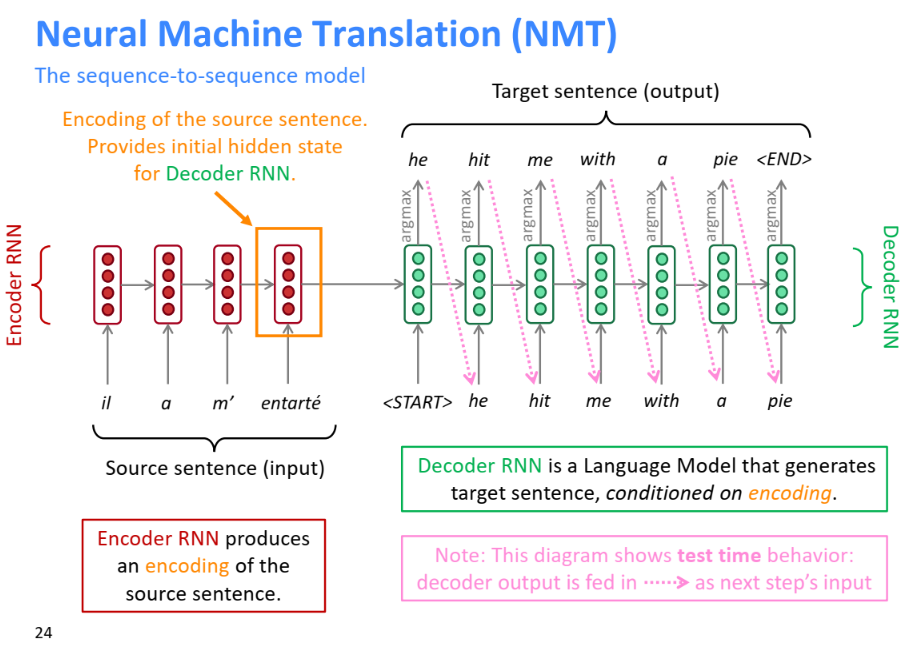

### NMT Principle

Direct calculation of $P(y|x)$ :

$ P(y|x) = P(y_1 | x) \, P(y_2 | y_1, x) \, P(y_3 | y_1, y_2, x)  ...  P(y_T | y_1, ..., y_{T-1}, x) $

### Training a Model

We need:
* A parallel corpus
* Words embeddings for words in both languages (source & target)

* Here, in NMT, we learn the translation objective directly
* While in SMT, we were doing it indirectly, by separating the task into different subtasks

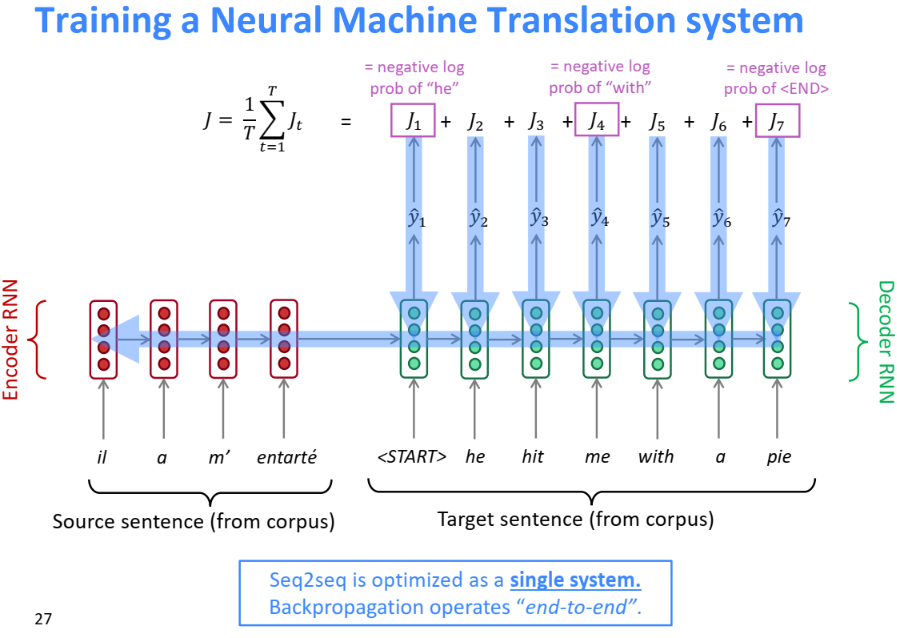

The backprop is happening end-to-end:
* one end is the loss functions
* the other end is the beginning state of the encoder RNN

Backprop flows through the entire system

⚠️ **Difference between Training & Testing** ⚠️

During Training, in the Decoder RNN, we don't feed the previous prediction into the next step  
Instead, we feed each state the correct previous word from the corpus

It is possible to train the 2 RNN separately:  
for example, training a strong Language Model on its own, then initializing the Decoder RNN with it

**Remarks**

* In practice, we pad the short sentences up to a certain length

* We can use pre-trained word embeddings, or use word2vec or GloVe to train them  
And then, do the training of the Encoder/Decoder

### Towards Beam search Decoding

#### Problem of Greedy Decoding

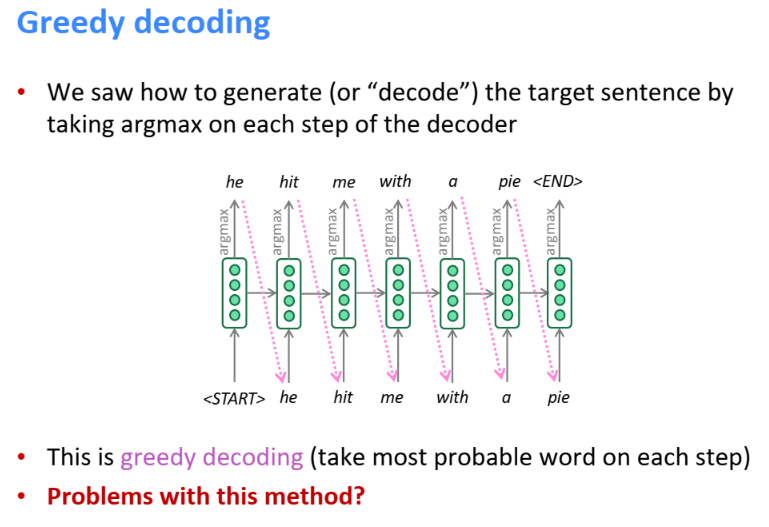

⚠️ **Problem** ⚠️   
The argmax at each step doesn't necessarily give us the global argmax for the whole sentence !  

(ie, usually, the global optimum is not the combination of all the local optima)



* We can't search all the possibilities for the argmax, as it would be much too expensive to compute

→ Use a search algorithm: **Beam search**

#### Beam Search Decoding

* Beam size $k$:  
how big our search space is at any time

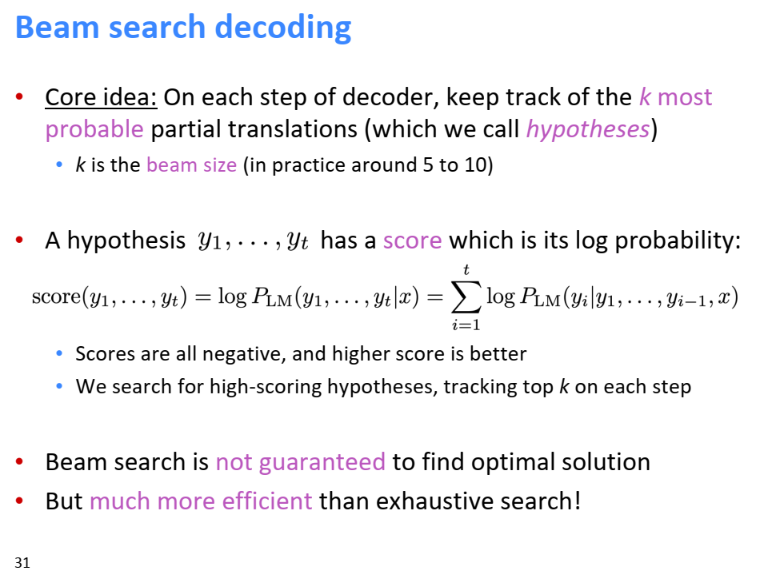

**Example**

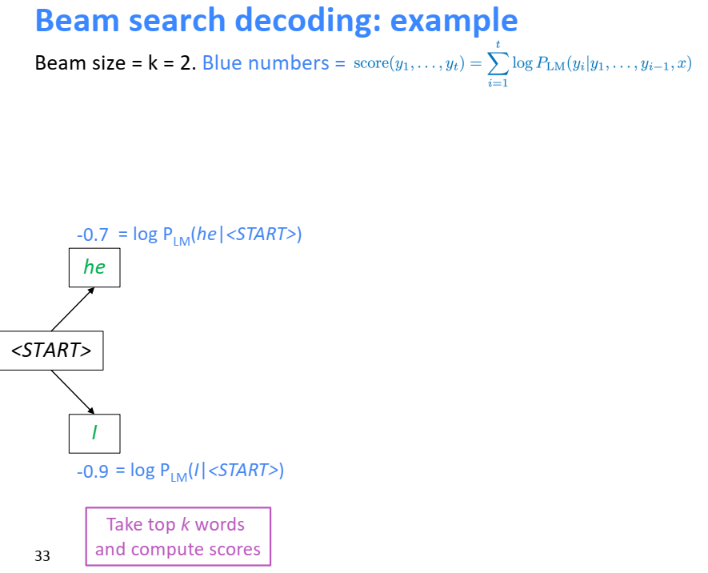

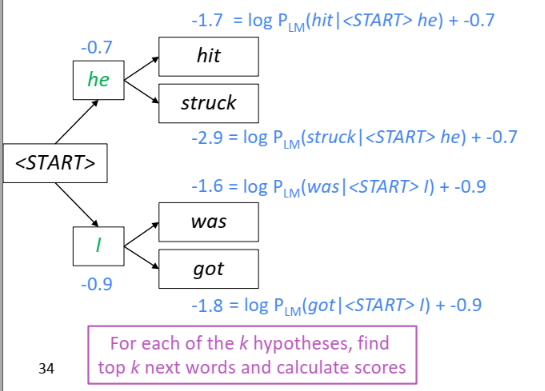

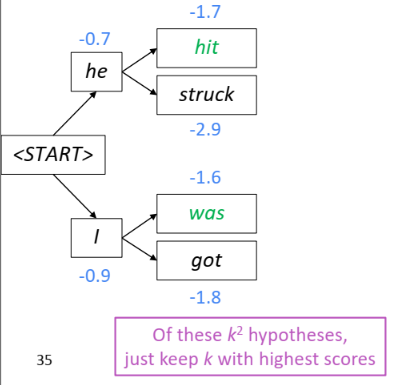

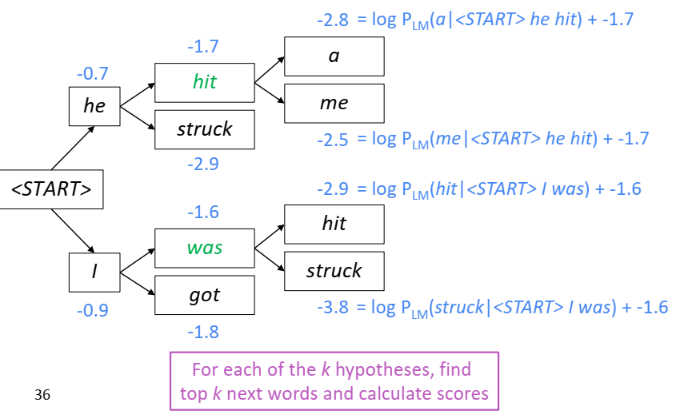

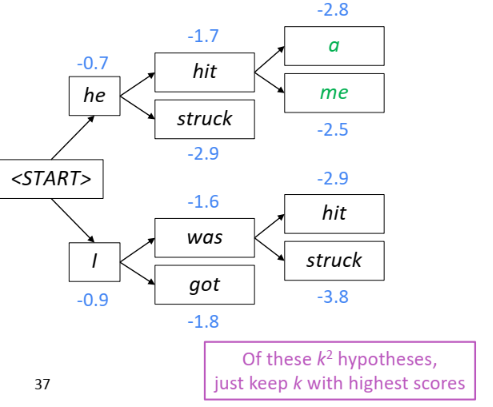

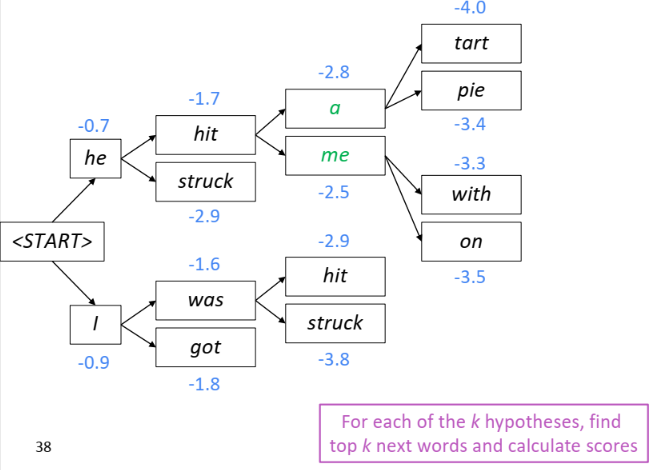

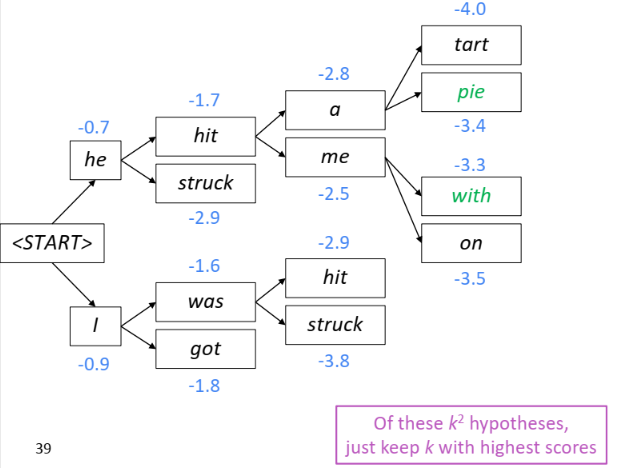

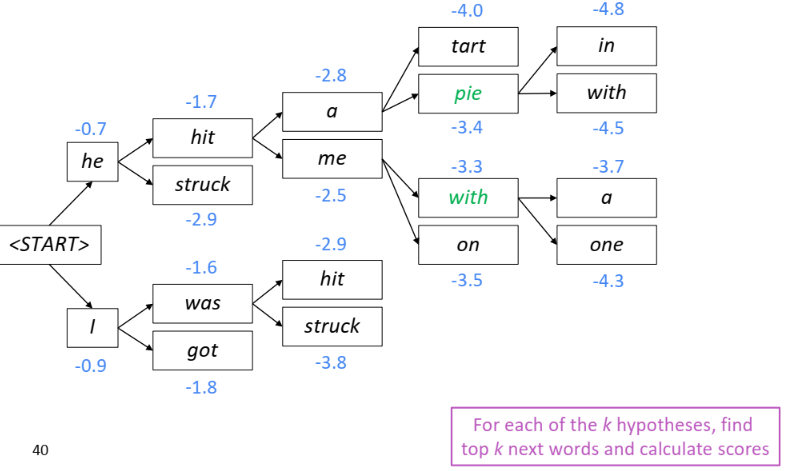

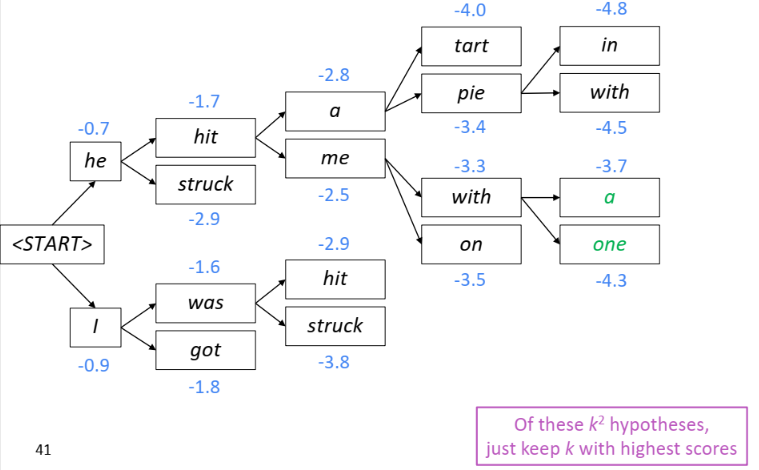

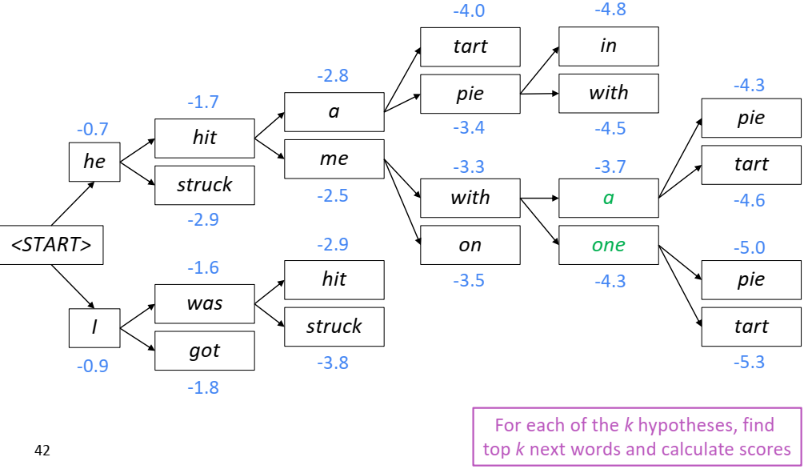

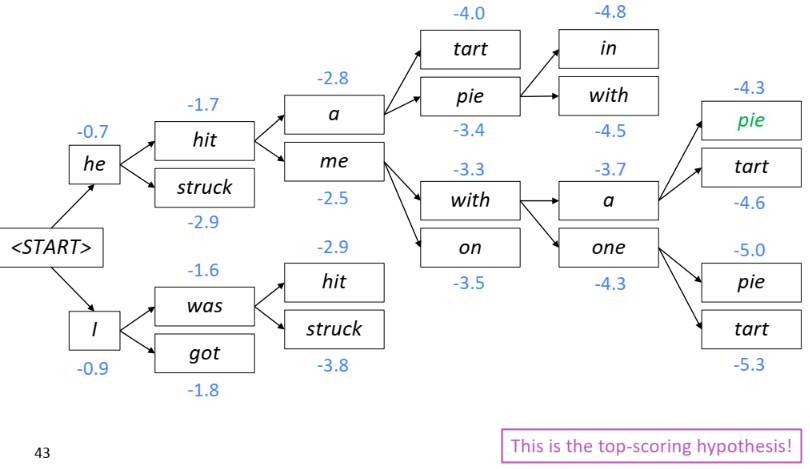

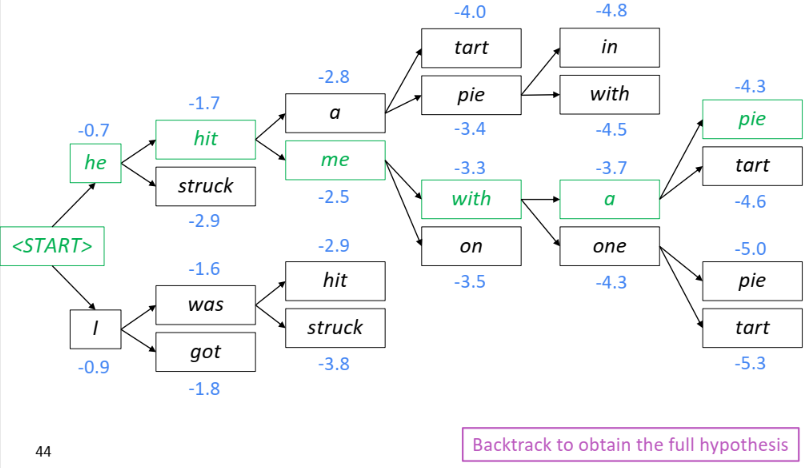

##### Stopping Criterion

Contiune exploring our hypothesis until:
* We reach a certain predefined timestep $T$
* We have a certain number of completed hypothesis $n$  
(ie, where the hypothesis has produced <END>)

##### ⚠️ Problem ⚠️

* As our hypothesis get longer, their probabilities get smaller, and thus their scores get smaller

→ Need to normalize these log-scores by the length of the sequence

### Advantages of NMT

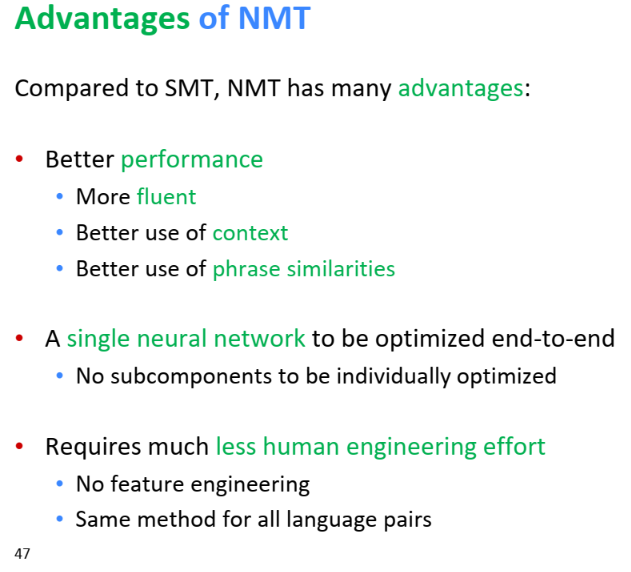

### Disadvantages of NMT

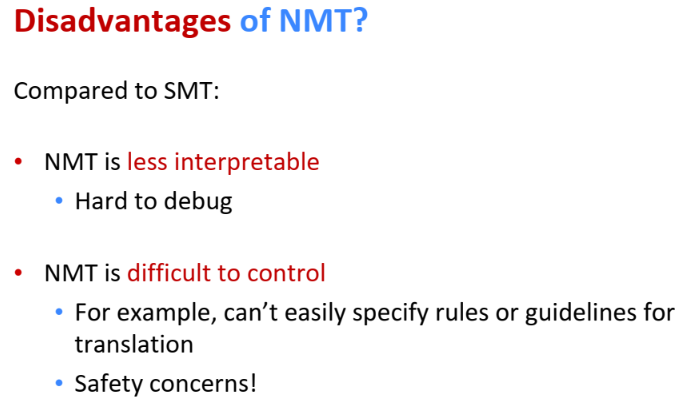

* Can't create rules such as:  
"I always want to translate this word *A* by *A'* "

---

## Evaluation of Machine Translation

**BLEU** (Bilingual Evaluation)

* Compare Machine Translation with several Human translations
* Compute a similarity score:
    * n-gram precision:  
    "For all the n-grams that appear in the Machine Translation, how many actually appear in one of the Human translations?"
    * Penalty score to penalize for too-short translations  
    (which could try to game the n-gram precision!)
    
Reward translations that have a high n-gram overlap with Human translations

⚠️ **Problem** ⚠️  
There can be several right translations, we may be giving accurate ones bad scores !

**Looking back at the past**
* NMT managed to outperform SMT rapidly, with only a few engineers compared to SMT !!

---

## Remaining Difficulties

* How to translate out-of-vocabulary words?

* Domain mismatch: formal ↔ informal

* Maintaning context over long text, without getting too expensive computationally

* Low-resource language pairs (languages with not much parallel data available online)  
For low-resource languages, one of the best sources of parallel text is the Bible...  
(ex of gibberish, translated as a Biblical sentence, from Somali to English)

* Still a lack of common sense:  
There can't be "jam of paper" !!

* Keeps biases of the training data:  
(Nurse → She) & (Programmer → He)

* Uninterpretability:  
Really weird effects can happen, and it's difficult to understand why !

---

## Attention

### Why Attention?

* Our whole source sentence has been captured as the last hidden state of the Encoder RNN

Thus, we have lost all the information that is not stored there  
Plus, it may suffer from a recency bias

→ Information **bottleneck** !

### What is Attention?

#### Idea

On each step of the decoder, use direct connection to the Encoder to focus on a particular part of the source sequence

* We take the dot products between the decoder hidden state, and all the Encoder hidden states  
→ We get **attention scores**

* We apply softmax to all these attention scores to get a probability distribution  
to know which parts of the encoded sentence are most relevant to our Decoder hidden state  
→ **Attention Distribution**

* Use the Attention Distribution to make a weighted score of the Encoder hidden states  
→ **Attention Output**  
It mostly contains information from the Hidden states with high Attention !

* Concatenate this Attention Output with Decoder Hidden State, to compute our output

#### Example

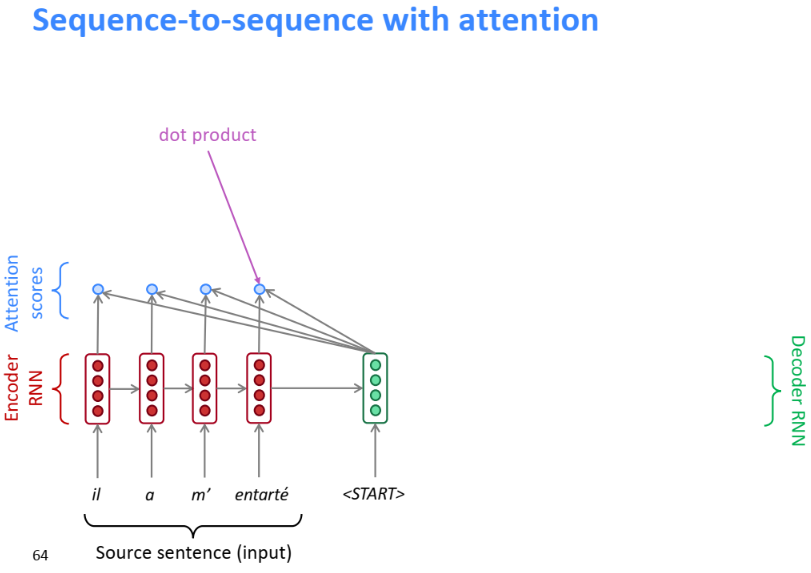

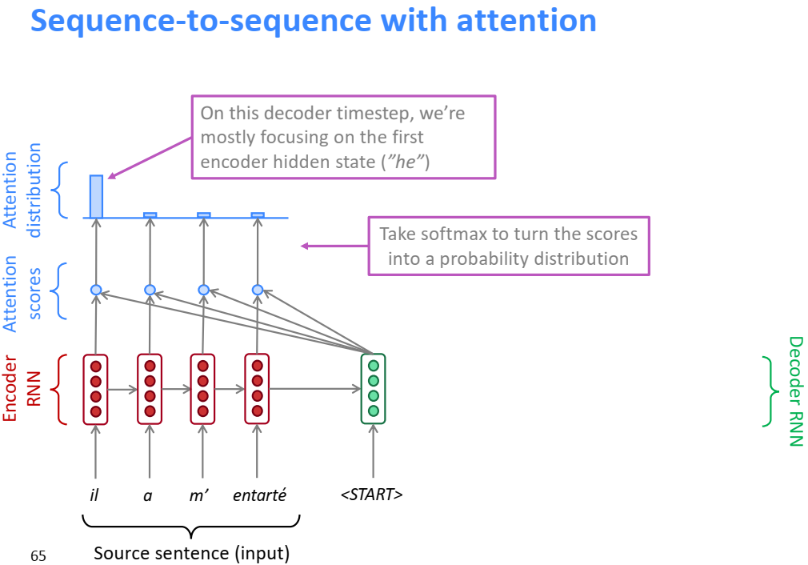

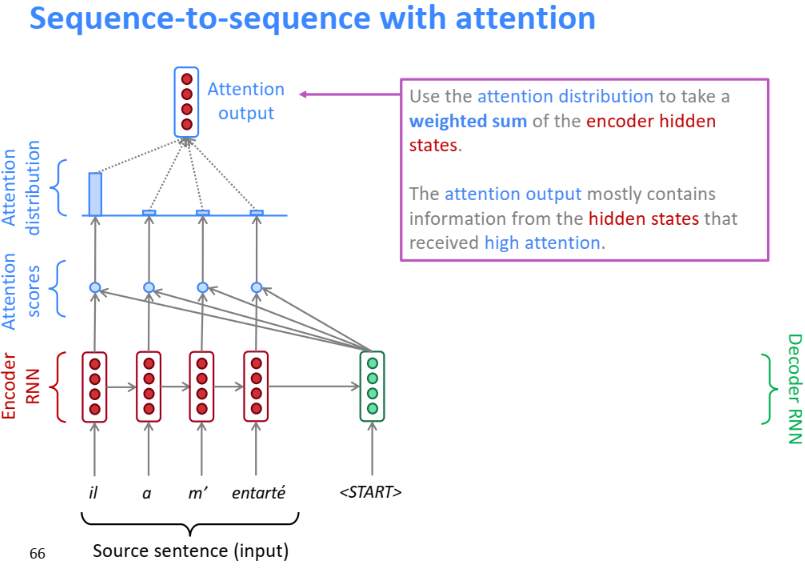

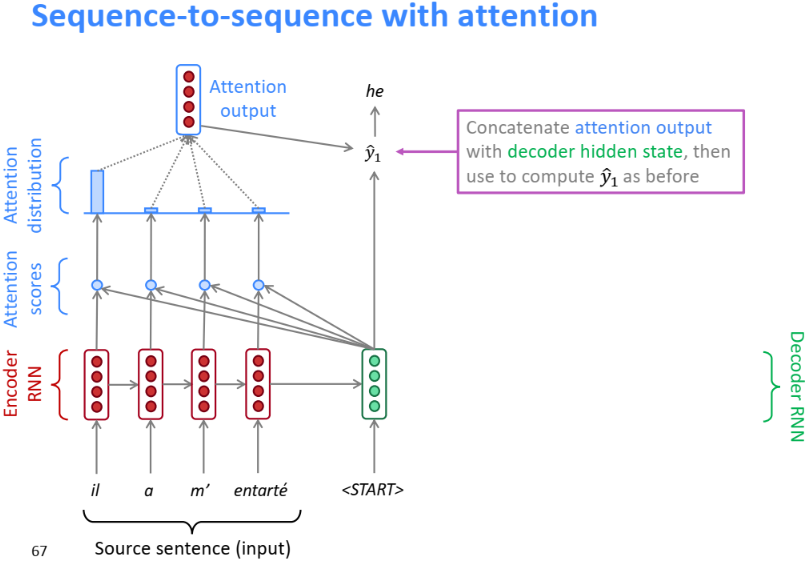

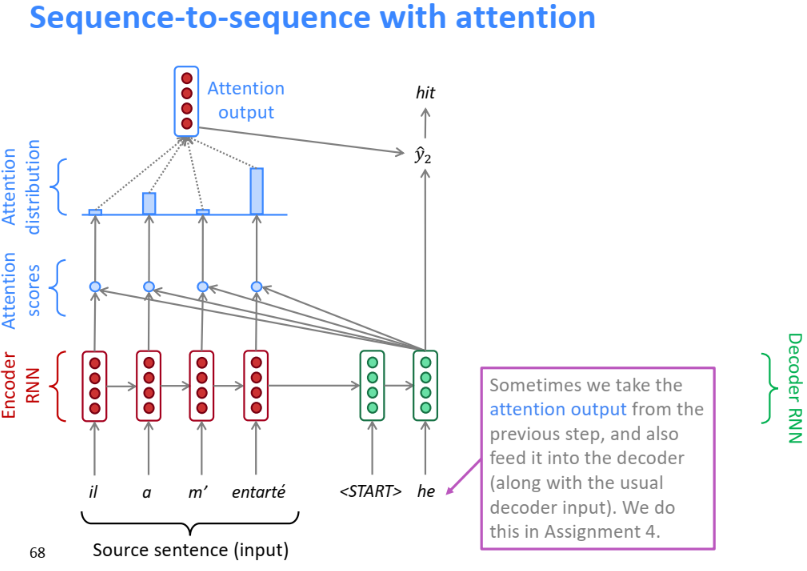

We can see here that Attention is a bit like a softer version of Alignment, which was much restricitve (binary)

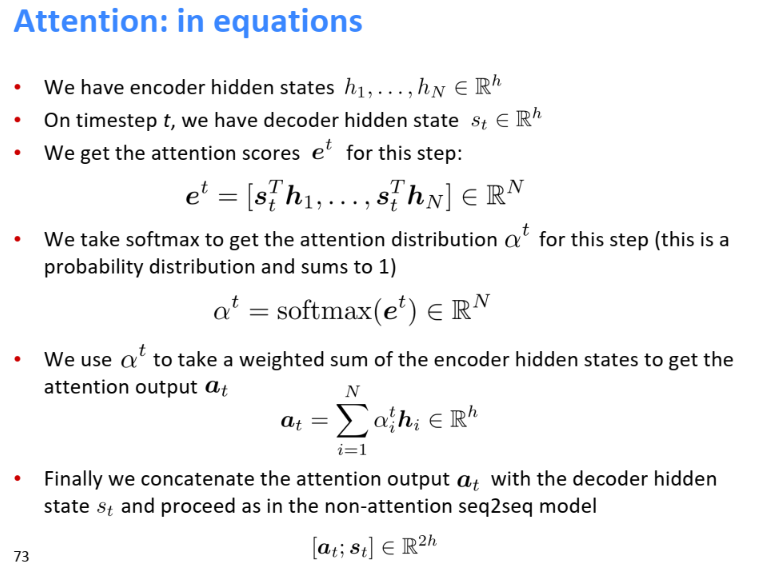

### Attention Advantages

* Attention allows Decoder to focus on only some parts of the source text

* Attention bypasses the bottleneck:  
Direct access to the source !

* The shortcut (skipping connections) helps with the **vanishing gradient** problem !!

* Provides some **interpretability** (~soft alignment)

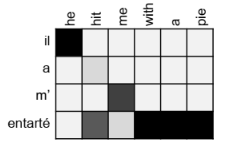

### Other Attention uses

Attention can also be used for other Deep Learning tasks

**Attention** needs:  
* Vector values
* Vector query

→ Compute a weighted sum of values, which is dependent on the query

* The weighted sum is a selective summary of the values information
* The query determines which values we focus on in our weighted sum

~ Similar to LSTM Gates, which depned on the context

* Attention is a way to get a **fixed-size** representation of any number of values

### Variants

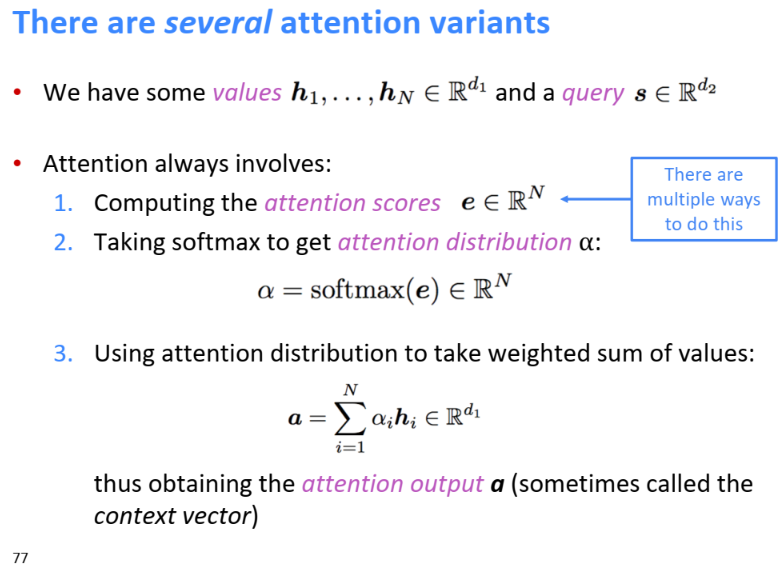

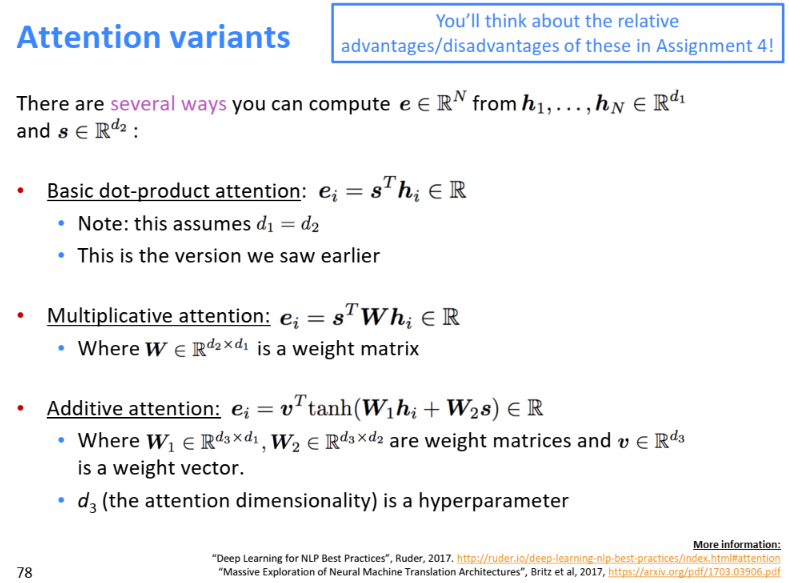

---

## Lecture Summary

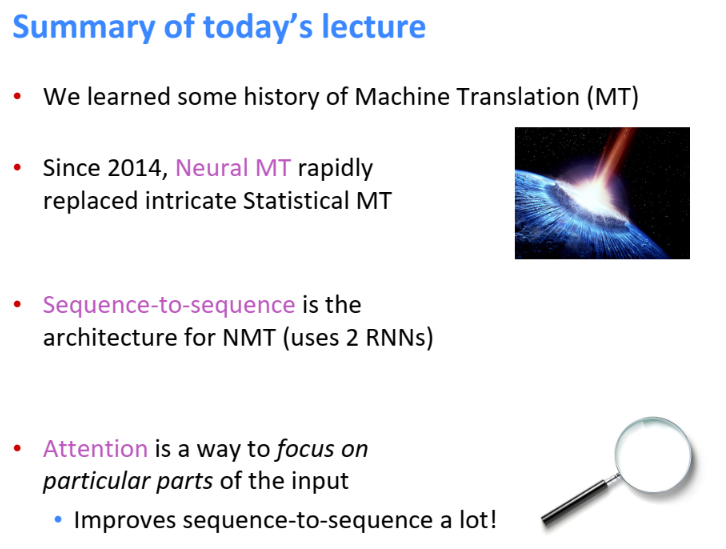